In [0]:
from google.colab import drive
#The best way to use files in Google colab is via Google Drive. So, we import drive module to connect it with Google colab

In [2]:
# Import libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np # linear algebra
from scipy.stats import randint
import math
import pandas as pd
import itertools
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import keras
from keras import optimizers
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense, LSTM
# Defaults
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams.update({'font.size': 12})
plt.style.use('ggplot')

Using TensorFlow backend.


In [0]:
#When you run this, it asks you to go to a URL for authentication. Once you land on the page, copy the code available and paste it in the textbox titled
#'Enter your authorization code' and hit enter.
#drive.mount("/content/drive")

In [0]:
train = pd.read_csv("/content/drive/My Drive/Terra_blu/train_csv.csv")

In [29]:
#Converting time object to datetime
train['time']= pd.to_datetime(train['time']) 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   id       80 non-null     int64         
 1   time     80 non-null     datetime64[ns]
 2   feature  80 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.0 KB


In [30]:
train.drop('id', inplace=True, axis=1)
train.set_index(['time'], inplace=True)
train.head()

,feature
time,
2019-03-19 00:00:00,237.97
2019-03-19 00:00:10,57.93
2019-03-19 00:00:20,90.53
2019-03-19 00:00:30,260.75
2019-03-19 00:00:40,49.70


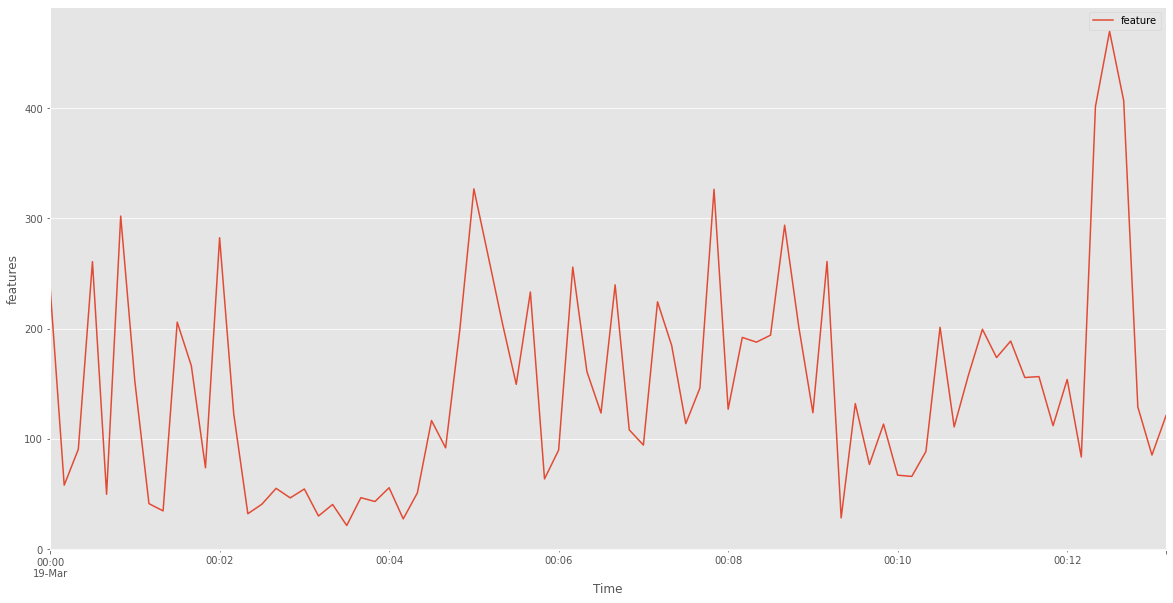

In [7]:
# Plot the data
train.plot()
plt.ylabel('features')
plt.xlabel('Time')
plt.show()

In [31]:
training_data = train.values
#Get /Compute the number of rows to train the model on
training_data_len = math.ceil( len(training_data) *.8)
training_data_len


64

In [0]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(training_data)

In [10]:
len(scaled_data)

80

In [33]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
len(train_data)

64

In [0]:
#Split the data into x_train and y_train data sets
x_train=[]
y_train = []
for i in range(1, len(train_data)):
    x_train.append(train_data[i-1:i,0])
    y_train.append(train_data[i,0])

In [0]:
#from sklearn.model_selection import train_test_split
#x_train, x_valid, y_train, y_valid = train_test_split(train_data, labels.values, test_size=0.4, random_state=0)

In [0]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [36]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(63, 1, 1)

In [37]:
#Build the LSTM network model
from keras.layers import Dropout
model_lstm = Sequential()
model_lstm.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50, return_sequences=True))
model_lstm.add(Dropout(0.2))
model_lstm.add(LSTM(50, return_sequences=False))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(1))

#Compile the model
model_lstm.compile(loss='mse', optimizer='adam')
model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 1, 50)             10400     
_________________________________________________________________
dropout_5 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 1, 50)             0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 50)               

In [38]:
#Train the model
model_lstm.fit(x_train, y_train, batch_size=50, epochs=150)

Epoch 1/150
63/63 [==============================] - 1s 22ms/step - loss: 0.1002
Epoch 2/150
63/63 [==============================] - 0s 232us/step - loss: 0.0973
Epoch 3/150
63/63 [==============================] - 0s 226us/step - loss: 0.0939
Epoch 4/150
63/63 [==============================] - 0s 228us/step - loss: 0.0905
Epoch 5/150
63/63 [==============================] - 0s 244us/step - loss: 0.0869
Epoch 6/150
63/63 [==============================] - 0s 267us/step - loss: 0.0831
Epoch 7/150
63/63 [==============================] - 0s 254us/step - loss: 0.0794
Epoch 8/150
63/63 [==============================] - 0s 223us/step - loss: 0.0758
Epoch 9/150
63/63 [==============================] - 0s 252us/step - loss: 0.0720
Epoch 10/150
63/63 [==============================] - 0s 246us/step - loss: 0.0681
Epoch 11/150
63/63 [==============================] - 0s 264us/step - loss: 0.0641
Epoch 12/150
63/63 [==============================] - 0s 242us/step - loss: 0.0606
Epoch 13/150
6

In [39]:
#Test data set
test_data = scaled_data[training_data_len - 1: , : ]
len(test_data)

17

In [0]:
#Create the x_test and y_test data sets
x_test = []
y_test =  training_data[training_data_len : , : ] #Get all of the rows from index 1603 to the rest and all of the columns (in this case it's only column 'Close'), so 2003 - 1603 = 400 rows of data
for i in range(1,len(test_data)):
    x_test.append(test_data[i-1:i,0])

In [20]:
len(x_test)

16

In [21]:
len(y_test)

16

In [0]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [0]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [0]:
#Getting the models predicted price values
predictions = model_lstm.predict(x_test) 
predictions = scaler.inverse_transform(predictions)#Undo scaling

In [44]:
#Calculate/Get the value of RMSE
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

110.90394805929512

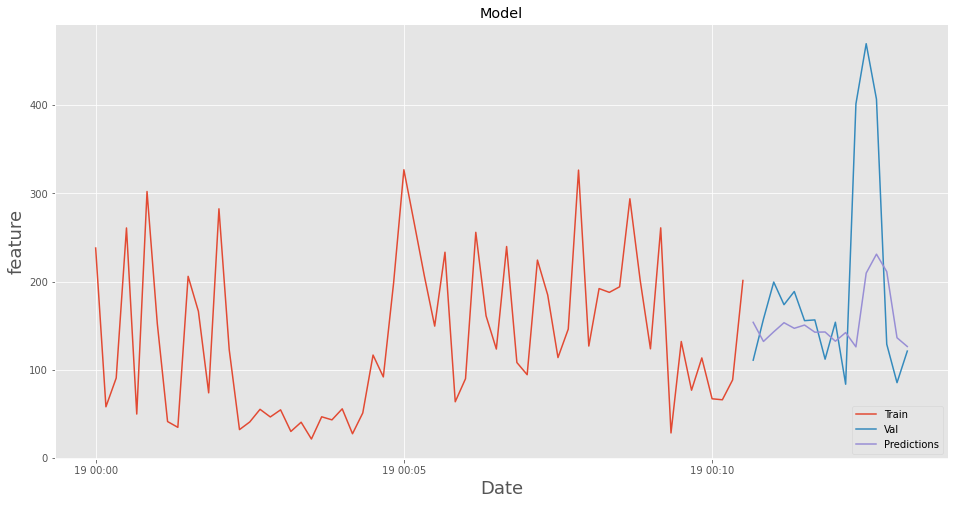

In [45]:
data = train.filter(['feature'])
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('feature', fontsize=18)
plt.plot(train['feature'])
plt.plot(valid[['feature', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [46]:
#Show the valid and predicted prices
valid

,feature,Predictions
time,,
2019-03-19 00:10:40,110.79,153.740936
2019-03-19 00:10:50,157.37,132.035172
2019-03-19 00:11:00,199.37,142.963287
2019-03-19 00:11:10,173.72,153.288300
2019-03-19 00:11:20,188.69,146.929016
2019-03-19 00:11:30,155.62,150.619904
2019-03-19 00:11:40,156.46,142.542862
2019-03-19 00:11:50,111.91,142.744583
2019-03-19 00:12:00,153.83,132.291580
